<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# # Install the necessary libraries
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "survey_data_cleaned_analyzed_v3.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset

df.head()




,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,WorkedWith_Python,WorkedWith_JavaScript,WorkedWith_R,WorkedWith_TypeScript,WorkedWith_Lua,WorkedWith_HTML/CSS,WorkedWith_Kotlin,WorkedWith_C++,WorkedWith_PowerShell,Age_numeric
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary school,Books / Physical media,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Master's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time",No,Apples,NaN,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",No,Apples,NaN,Secondary school,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,21.0


In [3]:
# lets see all columns that has more than 50% missing values
missing_values = df.isnull().mean()
missing_columns = missing_values[missing_values > 0.5].index
print("Columns with more than 50% missing values:")
print(missing_columns)

Columns with more than 50% missing values:
Index(['PlatformAdmired', 'EmbeddedHaveWorkedWith', 'MiscTechAdmired',
       'AIToolInterested in Using', 'AIToolNot interested in Using',
       'AINextMore integrated', 'ICorPM', 'WorkExp', 'Knowledge_1',
       'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5',
       'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9',
       'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching',
       'TimeAnswering', 'Frustration', 'ProfessionalTech', 'ProfessionalCloud',
       'ProfessionalQuestion', 'JobSatPoints_1', 'JobSatPoints_4',
       'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8',
       'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11',
       'ConvertedCompYearly'],
      dtype='object')


JobSatPoints_1
0.0     11089
10.0     3917
20.0     2821
5.0      1468
30.0     1259
        ...  
83.0        1
43.0        1
7.5         1
36.0        1
29.0        1
Name: count, Length: 91, dtype: int64

<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


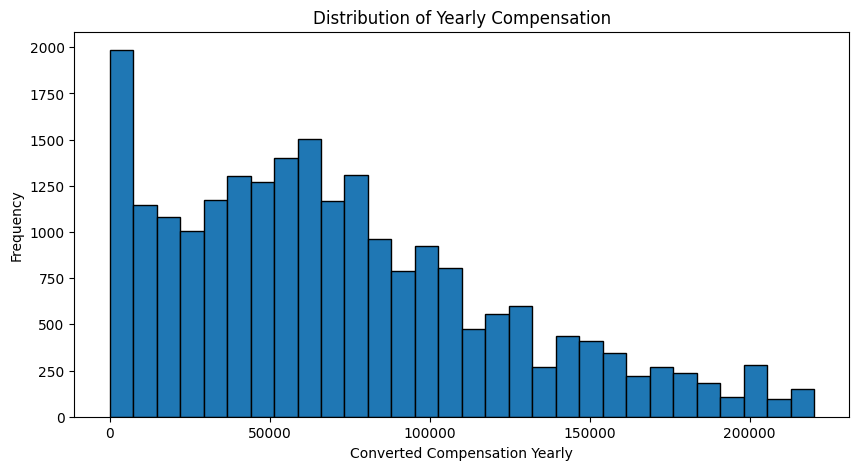

In [15]:
## Write your code here
df['ConvertedCompYearly'].plot(kind='hist', figsize=(10, 5), bins=30,  edgecolor='black')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Converted Compensation Yearly')
plt.ylabel('Frequency')
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


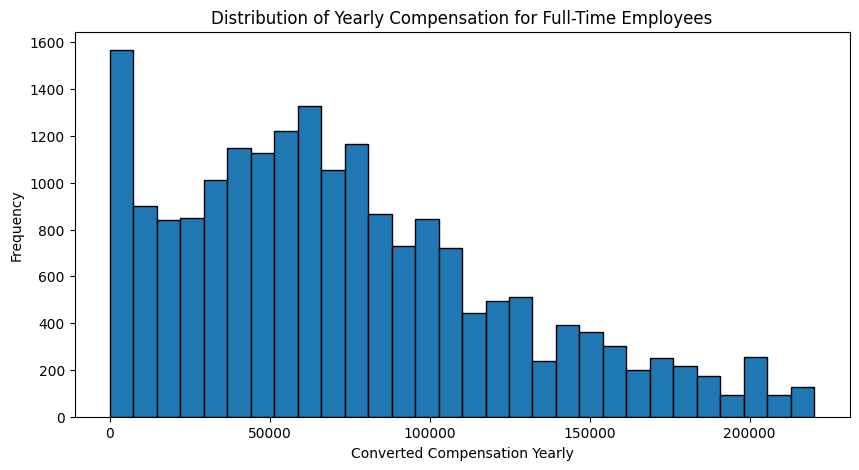

The median of ConvertedCompYearly for full-time employees is: 64444.0


In [14]:
## Write your code here
df_full_time = df[df['Is_Emp_full_time'] == 1]
df_full_time['ConvertedCompYearly'].plot(kind='hist', figsize=(10, 5), bins=30,  edgecolor='black')
plt.title('Distribution of Yearly Compensation for Full-Time Employees')
plt.xlabel('Converted Compensation Yearly')
plt.ylabel('Frequency')
plt.show()

median = df_full_time['ConvertedCompYearly'].median()

print(f"The median of ConvertedCompYearly for full-time employees is: {median}")

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



<Figure size 1200x600 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

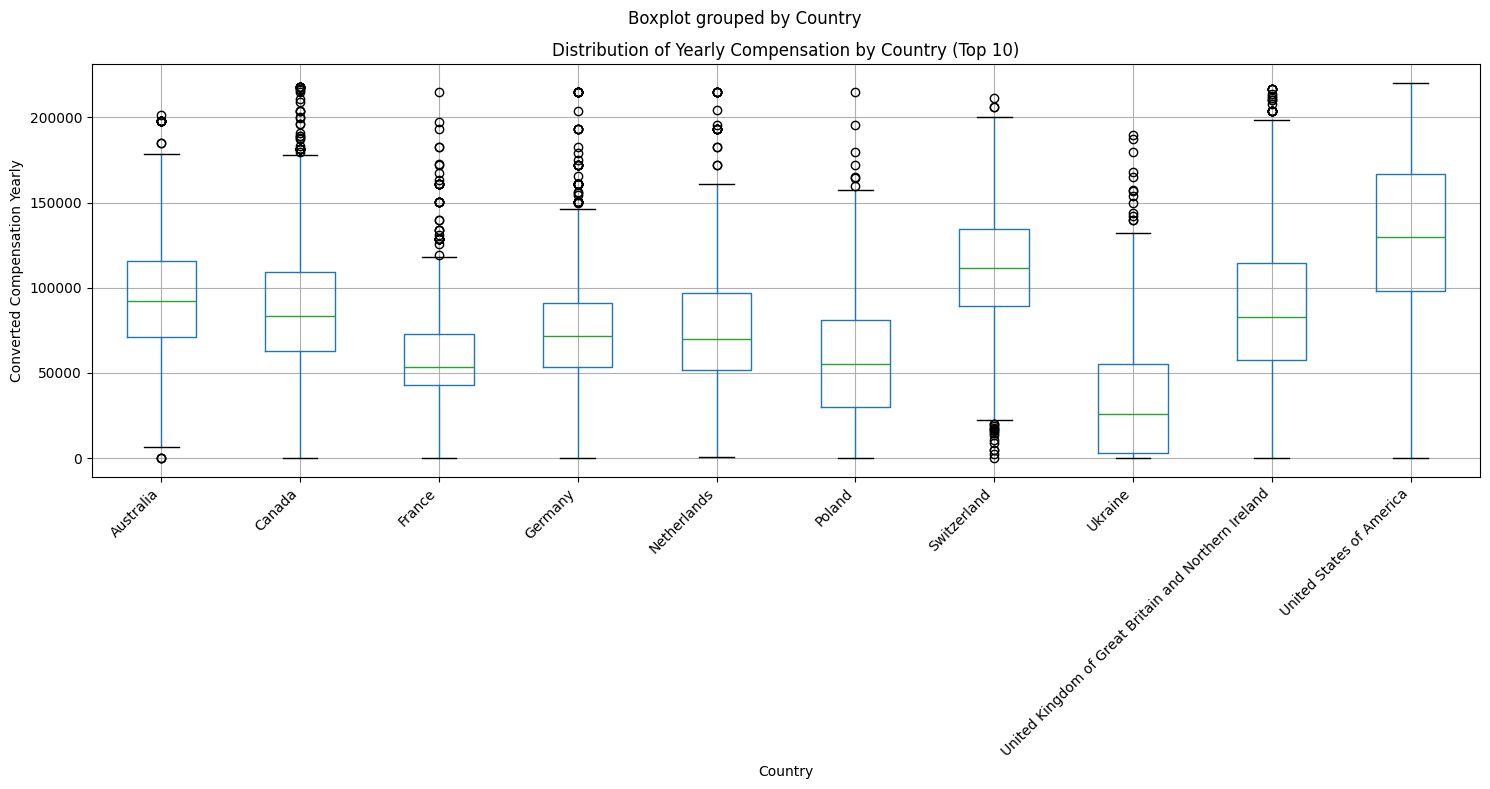

In [17]:
## Write your code here
df_top_10 = df.groupby('Country')['ConvertedCompYearly'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
# for country in df_top_10.index:
#     country_data = df[df['Country'] == country]
#     country_data['ConvertedCompYearly'].plot(kind='box')

# Filter data to only include top 10 countries
df_filtered = df[df['Country'].isin(df_top_10.index)]

# Create box plots for compensation by country (top 10 only)
plt.figure(figsize=(15, 8))
df_filtered.boxplot(column='ConvertedCompYearly', by='Country', figsize=(15, 8))
plt.title('Distribution of Yearly Compensation by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Converted Compensation Yearly')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [18]:
## Write your code here
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    q1 = country_data['ConvertedCompYearly'].quantile(0.25)
    q3 = country_data['ConvertedCompYearly'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = country_data[(country_data['ConvertedCompYearly'] < lower_bound) | (country_data['ConvertedCompYearly'] > upper_bound)]
    print(f"Country: {country}, Number of outliers: {len(outliers)}")
    df.drop(outliers.index, inplace=True)
    print(f"After removing outliers, dataset shape: {df.shape}")

Country: United States of America, Number of outliers: 0
After removing outliers, dataset shape: (63913, 156)
Country: United Kingdom of Great Britain and Northern Ireland, Number of outliers: 21
After removing outliers, dataset shape: (63892, 156)
Country: Canada, Number of outliers: 37
After removing outliers, dataset shape: (63855, 156)
Country: Norway, Number of outliers: 11
After removing outliers, dataset shape: (63844, 156)
Country: Uzbekistan, Number of outliers: 1
After removing outliers, dataset shape: (63843, 156)
Country: Serbia, Number of outliers: 0
After removing outliers, dataset shape: (63843, 156)
Country: Poland, Number of outliers: 7
After removing outliers, dataset shape: (63836, 156)
Country: Philippines, Number of outliers: 4
After removing outliers, dataset shape: (63832, 156)
Country: Bulgaria, Number of outliers: 4
After removing outliers, dataset shape: (63828, 156)
Country: Switzerland, Number of outliers: 18
After removing outliers, dataset shape: (63810, 1

### Fix Country Names

In [19]:
for row, col in df.iterrows():
    if col['Country'] == 'Micronesia, Federated States of...':
        df.at[row, 'Country'] = 'Micronesia'
    elif col['Country'] == 'Iran, Islamic Republic of...':
        df.at[row, 'Country'] = 'Iran'
    elif col['Country'] == 'United Kingdom of Great Britain and Northern Ireland':
        df.at[row, 'Country'] = 'United Kingdom'
    elif df.at[row, 'Country'] == 'Congo, Republic of the...' or df.at[row, 'Country'] == 'Democratic Republic of the Congo':
        df.at[row, 'Country'] = 'Congo'
    elif df.at[row, 'Country'] == "Democratic People's Republic of Korea":
        df.at[row, 'Country'] = 'North Korea'
    elif df.at[row, 'Country'] == "Lao People's Democratic Republic":
        df.at[row, 'Country'] = 'Laos'
    elif df.at[row, 'Country'] == 'Venezuela, Bolivarian Republic of...':
        df.at[row, 'Country'] = 'Venezuela'
    elif df.at[row, 'Country'] == 'Republic of Korea':
        df.at[row, 'Country'] = 'South Korea'


In [20]:
df['Country'].unique()

array(['United States of America', 'United Kingdom', 'Canada', 'Norway',
       'Uzbekistan', 'Serbia', 'Poland', 'Philippines', 'Bulgaria',
       'Switzerland', 'India', 'Germany', 'Ireland', 'Italy', 'Ukraine',
       'Australia', 'Brazil', 'Japan', 'Austria', 'Iran', 'France',
       'Saudi Arabia', 'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden',
       'Netherlands', 'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia', 'Greece',
       'Israel', 'Belgium', 'Mexico', 'United Republic of Tanzania',
       'Hungary', 'Argentina', 'Portugal', 'Sri Lanka', 'Latvia', 'China',
       'Singapore', 'Lebanon', 'Spain', 'Russian Federation',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecuador', 'Malaysia', 'Albania', 'Chile', 'Ghana',
       'Peru', 'Bolivia', 'E

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


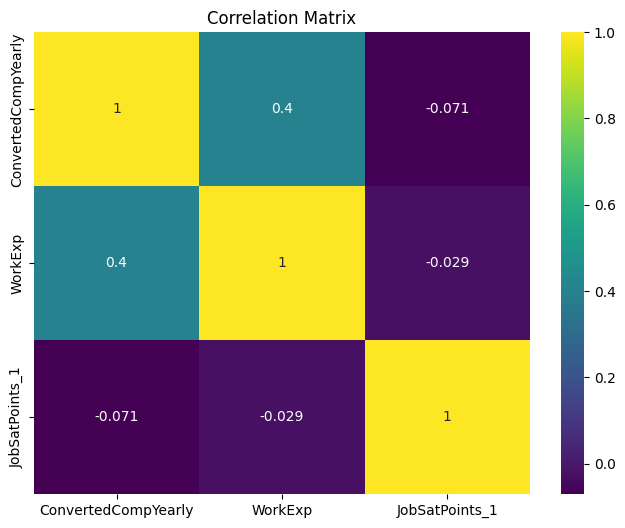

In [28]:
## Write your code here
corr_matrix = df[['ConvertedCompYearly', 'WorkExp','JobSatPoints_1']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


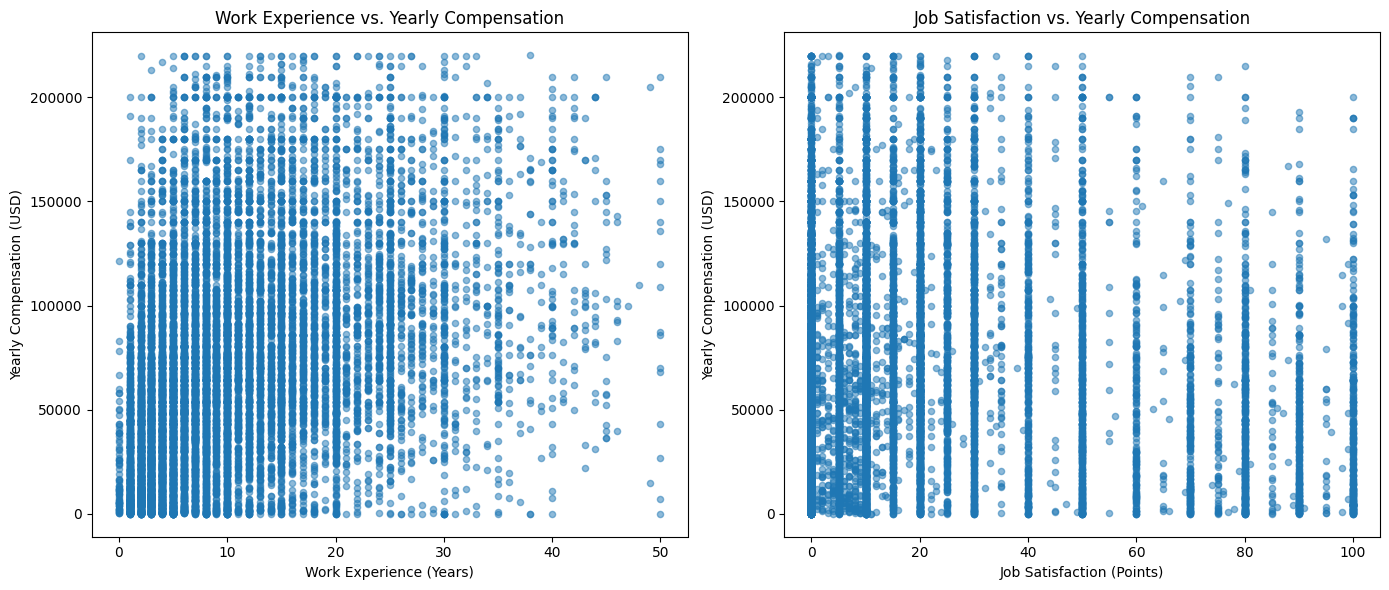

In [35]:
## Write your code here
# lets have 2 graphes 
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
df.plot(kind='scatter', x='WorkExp', y='ConvertedCompYearly', alpha=0.5, ax=ax1)
plt.title('Work Experience vs. Yearly Compensation')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD)')

ax2 = plt.subplot(1, 2, 2)
df.plot(kind='scatter', x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.5, ax=ax2)
plt.title('Job Satisfaction vs. Yearly Compensation')
plt.xlabel('Job Satisfaction (Points)')
plt.ylabel('Yearly Compensation (USD)')

plt.tight_layout()
plt.show()

In [36]:
## Write your code here
output_filename = 'survey_data_final_m3.csv'
df.to_csv(output_filename, index=False)
print(f"Dataset saved as '{output_filename}'")

# Print summary of the final dataset
print(f"\nFinal dataset summary:")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Missing values per column:")
print(df.isnull().sum().sum()/len(df.columns))

print(f"\nDataset successfully saved and ready for further analysis!")

Dataset saved as 'survey_data_final_m3.csv'

Final dataset summary:
Shape: (63184, 156)
Columns: 156
Missing values per column:
15089.339743589744

Dataset successfully saved and ready for further analysis!


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
